# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
data_file = '/content/drive/MyDrive/mit/projects/elective/SVHN_single_grey1.h5'

## **Importing the necessary libraries**

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
import os.path
data_file = os.path.abspath(os.getcwd() + "../../../../../../../data/data_science_mit/digit_recognition/SVHN_single_grey1.h5")
print(data_file)

d:\GitHub\amitprakash07\snowflake\data\data_science_mit\digit_recognition\SVHN_single_grey1.h5


**Let us check the version of tensorflow.**

In [4]:
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.18.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [5]:
h5py_file = h5py.File(data_file, 'r')

Check the number of images in the training and the testing dataset.

In [8]:
data_keys = list(h5py_file.keys())
print(data_keys)

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [9]:
print(h5py_file.values())

ValuesViewHDF5(<HDF5 file "SVHN_single_grey1.h5" (mode r)>)


In [10]:
h5py_file.items()

ItemsViewHDF5(<HDF5 file "SVHN_single_grey1.h5" (mode r)>)

In [6]:
# Data information
class h5_utils:
  @staticmethod
  def show_items(name, obj):
      print(name)
      print(obj)

  @staticmethod
  def show_grp(grp_name):
    print(grp_name)

In [11]:
total_entry = 0
for key in data_keys:
  total_entry += h5py_file[key].shape[0]
  print(key, h5py_file[key].shape)
print("Total entries:", total_entry)

X_test (18000, 32, 32)
X_train (42000, 32, 32)
X_val (60000, 32, 32)
y_test (18000,)
y_train (42000,)
y_val (60000,)
Total entries: 240000


In [10]:
h5py_file.visit(h5_utils.show_grp)

X_test
X_train
X_val
y_test
y_train
y_val


In [11]:
h5py_file.visititems(h5_utils.show_items)

X_test
<HDF5 dataset "X_test": shape (18000, 32, 32), type "<f4">
X_train
<HDF5 dataset "X_train": shape (42000, 32, 32), type "<f4">
X_val
<HDF5 dataset "X_val": shape (60000, 32, 32), type "<f4">
y_test
<HDF5 dataset "y_test": shape (18000,), type "|u1">
y_train
<HDF5 dataset "y_train": shape (42000,), type "|u1">
y_val
<HDF5 dataset "y_val": shape (60000,), type "|u1">


**Observation:**

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use ~~Y_train~~ y_train to print the first 10 labels.

In [12]:
X_train = h5py_file['X_train']
Y_train = h5py_file['y_train']

In [13]:
X_test = h5py_file['X_test']
Y_test = h5py_file['y_test']

In [14]:
X_train.shape

(42000, 32, 32)

In [52]:
# Utility class for svhn iamges
class svhn_image:
  @staticmethod
  def show_image(image_data: np.array, title: str):
    plt.imshow(image_data)
    plt.title(title)
    plt.show()

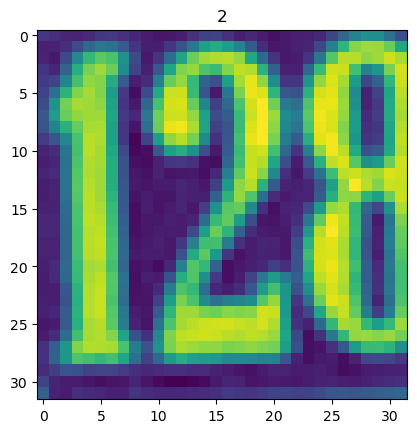

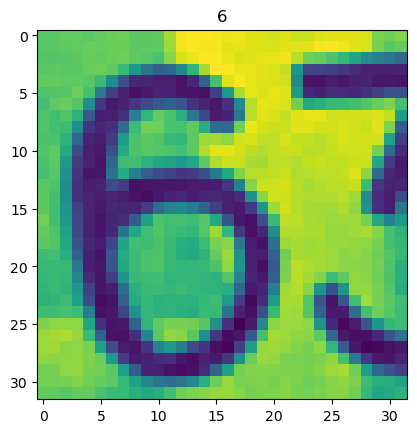

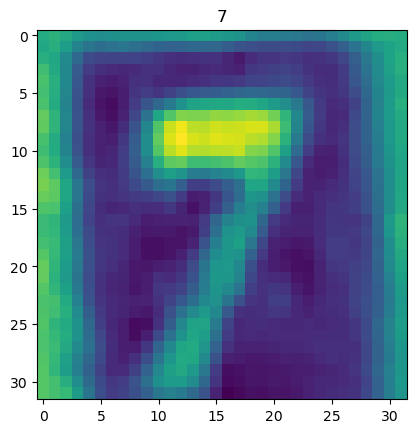

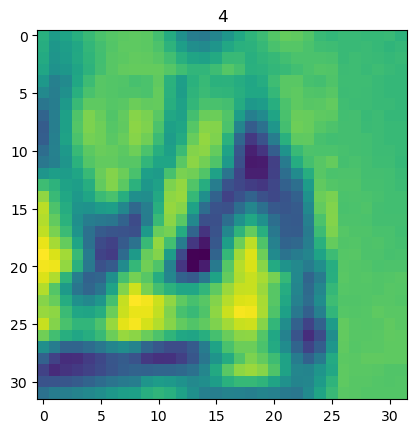

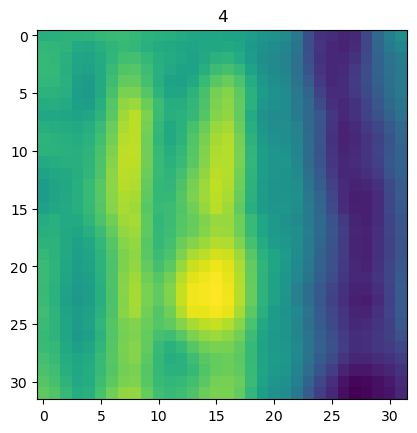

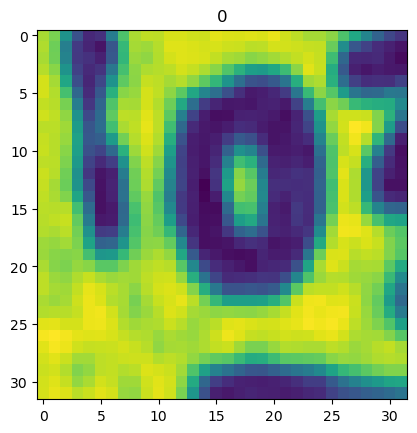

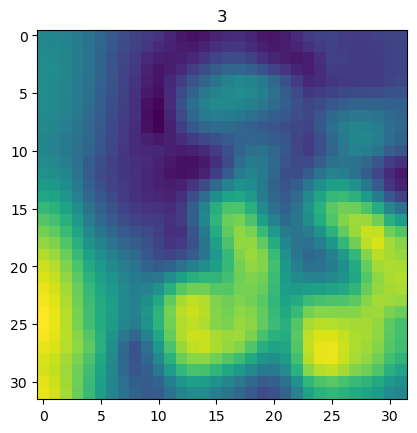

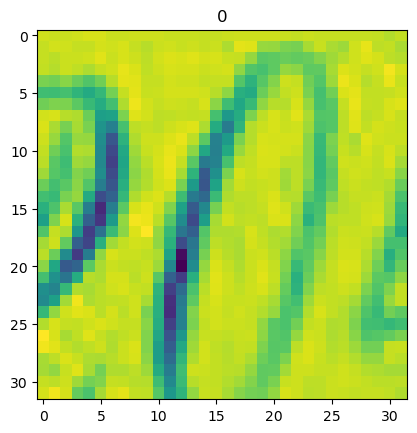

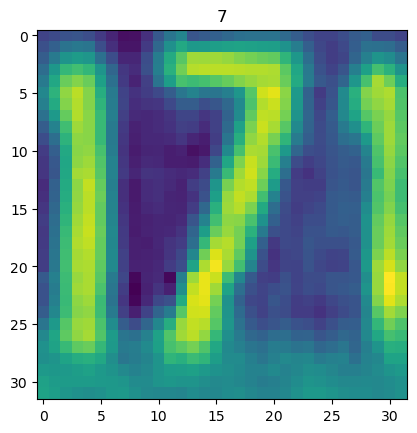

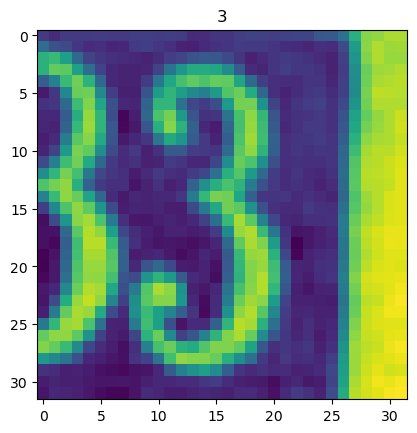

In [ ]:
# Display the first 10 images of the training dataset with the title from the labeled data
for i in range(10):
  svhn_image.show_image(X_train[i], Y_train[i])

## **Data Observations**

*   There are six groups in the H5 formatted data among 3 groups contains images, and other 3 contains labels for each image data set
*  X_val, and Y_val are the subset of original SVINH data and splitted into training and test data in X_train, X_test respectively. Similarly the corresponding labeled data is also splitted in y_train and y_test datasets.




## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [14]:
print("Shape of the first image in the training dataset")
X_train[0].shape

Shape of the first image in the training dataset


(32, 32)

In [15]:
print("Image data of the first image in the traiing dataset")
X_train[0]

Image data of the first image in the traiing dataset


array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

## Convert the H5 dataset to np array

In [16]:
# Let's first bring the data to np arrays
np_x_train = np.zeros(X_train.shape, dtype=np.float32)
np_x_test = np.zeros(X_test.shape, dtype=np.float32)

In [17]:
X_train.read_direct(np_x_train)
print(np_x_train[0])

[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [18]:
print(np_x_train.shape)
print(np_x_test.shape)

(42000, 32, 32)
(18000, 32, 32)


In [ ]:
def flatten_image_data(image_array: np.array):
    image_flatten_size = image_array.shape[1] * image_array.shape[2]
    flattened_array = np.zeros((image_array.shape[0], image_flatten_size))
    for i in range(image_array.shape[0]):
        flattened_array[i] = np.reshape(image_array[i], image_flatten_size)
    return flattened_array

In [20]:
x_train_flattened = flatten_image_data(np_x_train)
x_test_flattened = flatten_image_data(np_x_test)

In [21]:
print(x_train_flattened.shape)
print(x_train_flattened[0])

(42000, 1024)
[33.07040024 30.26009941 26.85199928 ... 49.66820145 50.85300064
 53.03770065]


### **Normalize the train and the test data**

In [22]:
np_x_train_normalized = x_train_flattened / 255
np_x_test_normalized = x_test_flattened / 255

Print the shapes of Training and Test data

In [23]:
print(np_x_train_normalized.shape)
print(np_x_test_normalized.shape)

(42000, 1024)
(18000, 1024)


In [24]:
np_x_train_normalized[0]

array([0.12968784, 0.11866706, 0.10530196, ..., 0.19477726, 0.19942353,
       0.20799098])

### **One-hot encode output**

In [ ]:
# Creating one-hot encoded representation of target labels

# We can do this by using this utility function - https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
y_train_encoded = tf.keras.utils.to_categorical(Y_train)
y_test_encoded = tf.keras.utils.to_categorical(Y_test)

In [26]:
print(y_train_encoded.shape)
print(y_test_encoded.shape)

(42000, 10)
(18000, 10)


In [27]:
print(y_train_encoded[0])
print(Y_train[0])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
2


**Observation:**


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [396]:
np.random.seed(17)
import random
random.seed(17)
tf.random.set_seed(17)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

In [28]:
class TfKeraModel:
    def __init__(self, model:tf.keras.models, name:str=""):
        self.__name__ = name
        self.__onnx_file_name__ = ""  
        self.__history__ = None   
        self.__model__ = model

    def export_to_onnx(self, file_name):
        print("Exporting to ONNX format")
        self.__onnx_file_name__ = file_name

    def display_model():
        print("Displaying Model")        

    def summary(self):
        self.__model__.summary()

    def model(self)->tf.keras.models.Sequential:
        return self.__model__
    
    def set_model_history(self, history:tf.keras.callbacks.History):
        self.__history__ = history

    def get_model_history(self)->tf.keras.callbacks.History:
        return self.__history__


In [29]:
# we have each image as input to a node, and each image
# size is 32 x 32 = 1024
class TfKeraModel_ANN(TfKeraModel):
    @staticmethod
    def nn_model_1():
        model = tf.keras.models.Sequential()
        model.add(tf.keras.layers.Dense(64, input_shape = (1024,), activation=tf.keras.activations.relu))
        model.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu))
        model.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax))
        return TfKeraModel_ANN(model)
    
    def __init__(self, seq_model:tf.keras.models.Sequential):
        super().__init__(seq_model)
        self.__model__ = seq_model        

    def compile(self):
        print('Compiling model')
        self.__model__.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics = [tf.keras.metrics.Accuracy],
                    loss = tf.keras.losses.CategoricalCrossentropy)
        print("Model Compiled")

In [424]:
nn_model_1_seq = TfKeraModel_ANN.nn_model_1()

In [425]:
nn_model_1_seq.compile()

Compiling model
Model Compiled


In [422]:
nn_model_1_seq.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,010 (265.66 KB)

 Trainable params: 68,010 (265.66 KB)

 Non-trainable params: 0 (0.00 B)

### **Build and train an ANN model as per the above mentioned architecture.**

In [423]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit
model_history = nn_model_1_seq.model().fit(x=np_x_train_normalized, 
                           y=y_train_encoded, 
                           validation_split=0.2,
                           batch_size=128,
                           verbose=1,
                           epochs=20)

nn_model_1_seq.set_model_history(model_history)

Epoch 1/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.0000e+00 - loss: 2.3107 - val_accuracy: 0.0000e+00 - val_loss: 2.1682
Epoch 2/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0000e+00 - loss: 2.0283 - val_accuracy: 0.0000e+00 - val_loss: 1.6626
Epoch 3/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0000e+00 - loss: 1.6287 - val_accuracy: 0.0000e+00 - val_loss: 1.4838
Epoch 4/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0000e+00 - loss: 1.4720 - val_accuracy: 0.0000e+00 - val_loss: 1.3989
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0000e+00 - loss: 1.3821 - val_accuracy: 0.0000e+00 - val_loss: 1.3479
Epoch 6/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0000e+00 - loss: 1.3186 - val_accuracy: 0.0000e+00 - val_loss: 1.3005
Epoch 7/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0000e+00 - loss: 1.2676 - val_accuracy: 0.0000e+00 - val_loss: 1.2642
Epoch 8/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms

In [30]:
def show_model_history(model:TfKeraModel)->None:
    model_history = model.get_model_history().history
    if model_history is not None:
        key_count = len(model_history.keys())
        keys = list(model_history.keys())
        epoch_length = len(model_history[keys[0]])
        print(epoch_length)    
        for i in range(0, epoch_length):
            print_str = ""
            for key in keys:
                print_str += key + ":" + str(model_history[key][i]) + " "
            print(print_str)

def plot_model_history(model:TfKeraModel)->None:
    model_history = model.get_model_history().history
    if model_history is not None:
        plt.plot(model_history['accuracy'])
        plt.plot(model_history['val_accuracy'])
        plt.title('Model Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show()  

In [259]:
show_model_history(nn_model_1_seq)

20
accuracy:0.0 loss:2.284604787826538 val_accuracy:0.0 val_loss:2.2646427154541016 
accuracy:0.0 loss:2.229196786880493 val_accuracy:0.0 val_loss:2.137631893157959 
accuracy:0.0 loss:2.0519890785217285 val_accuracy:0.0 val_loss:1.9356571435928345 
accuracy:0.0 loss:1.8242731094360352 val_accuracy:0.0 val_loss:1.7173038721084595 
accuracy:0.0 loss:1.639050006866455 val_accuracy:0.0 val_loss:1.5738120079040527 
accuracy:0.0 loss:1.49862802028656 val_accuracy:0.0 val_loss:1.4717848300933838 
accuracy:0.0 loss:1.416100025177002 val_accuracy:0.0 val_loss:1.4145585298538208 
accuracy:0.0 loss:1.362828016281128 val_accuracy:0.0 val_loss:1.36838960647583 
accuracy:0.0 loss:1.3225880861282349 val_accuracy:0.0 val_loss:1.319748044013977 
accuracy:0.0 loss:1.2893762588500977 val_accuracy:0.0 val_loss:1.2846170663833618 
accuracy:0.0 loss:1.2616209983825684 val_accuracy:0.0 val_loss:1.2622531652450562 
accuracy:0.0 loss:1.2382698059082031 val_accuracy:0.0 val_loss:1.237970232963562 
accuracy:0.0 

### **Plot the Training and Validation Accuracies and write down your Observations.**

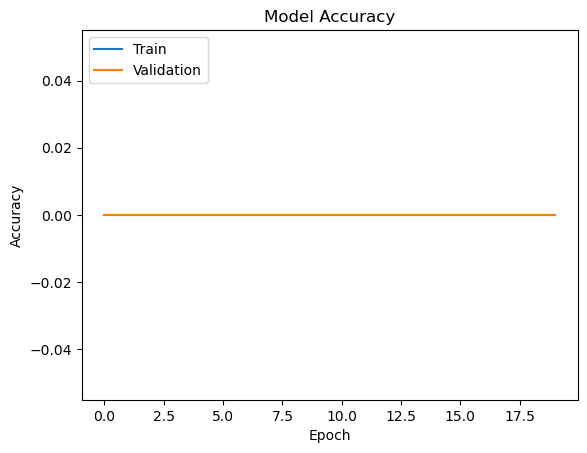

In [260]:
plot_model_history(nn_model_1_seq)

**Observations:**

Model's accuracy is almost zero in each of the epochs, clearly the model is not adequate enough even on the training data.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [31]:
# clear the session to release the resources
tf.keras.backend.clear_session()

In [32]:
# Re-seed the random number generators
np.random.seed(40)
import random
random.seed(40)
tf.random.set_seed(40)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [33]:
# we have each image as input to a node, and each image
# size is 32 x 32 = 1024
class TfKeraModel_ANN_2(TfKeraModel):
    @staticmethod
    def nn_model_2():
        model = tf.keras.models.Sequential()
        model.add(tf.keras.Input(shape=(1024,)))
        model.add(tf.keras.layers.Dense(256, activation=tf.keras.activations.relu))
        model.add(tf.keras.layers.Dense(128, activation=tf.keras.activations.relu))
        model.add(tf.keras.layers.Dropout(0.2))
        model.add(tf.keras.layers.Dense(64, activation=tf.keras.activations.relu))
        model.add(tf.keras.layers.Dense(64, activation=tf.keras.activations.relu))
        model.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.softmax))
        # https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax))
        return TfKeraModel_ANN_2(model)
    
    def __init__(self, seq_model:tf.keras.models.Sequential):
        super().__init__(seq_model)
        self.__model__ = seq_model        

    def compile(self):
        print('Compiling model')
        self.__model__.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005),
                    metrics = [tf.keras.metrics.Accuracy],
                    loss = tf.keras.losses.CategoricalCrossentropy)
        print("Model Compiled")

In [35]:
nn_model_2_seq = TfKeraModel_ANN_2.nn_model_2()

In [36]:
nn_model_2_seq.compile()

Compiling model
Model Compiled


In [37]:
model_history = nn_model_2_seq.model().fit(x=np_x_train_normalized, 
                           y=y_train_encoded, 
                           validation_split=0.2,
                           batch_size=128,
                           verbose=1,
                           epochs=30)

nn_model_2_seq.set_model_history(model_history)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0000e+00 - loss: 2.3079 - val_accuracy: 0.0000e+00 - val_loss: 2.2890
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0000e+00 - loss: 2.0592 - val_accuracy: 0.0000e+00 - val_loss: 1.7301
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0000e+00 - loss: 1.5482 - val_accuracy: 0.0000e+00 - val_loss: 1.3306
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0000e+00 - loss: 1.3513 - val_accuracy: 0.0000e+00 - val_loss: 1.2109
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0000e+00 - loss: 1.2418 - val_accuracy: 0.0000e+00 - val_loss: 1.1624
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0000e+00 - loss: 1.1718 - val_accuracy: 0.0000e+00 - val_loss: 1.1115
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0000e+00 - loss: 1.0957 - val_accuracy: 0.0000e+00 - val_loss: 1.0325
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/s

In [39]:
show_model_history(nn_model_2_seq)

30
accuracy:0.0 loss:2.2982683181762695 val_accuracy:0.0 val_loss:2.2890095710754395 
accuracy:0.0 loss:1.9061627388000488 val_accuracy:0.0 val_loss:1.7300786972045898 
accuracy:0.0 loss:1.4949495792388916 val_accuracy:0.0 val_loss:1.3305977582931519 
accuracy:0.0 loss:1.3271715641021729 val_accuracy:0.0 val_loss:1.210917592048645 
accuracy:0.0 loss:1.2268940210342407 val_accuracy:0.0 val_loss:1.1623811721801758 
accuracy:0.0 loss:1.1513152122497559 val_accuracy:0.0 val_loss:1.111474633216858 
accuracy:0.0 loss:1.0870202779769897 val_accuracy:0.0 val_loss:1.0325160026550293 
accuracy:0.0 loss:1.0421384572982788 val_accuracy:0.0 val_loss:0.9912704825401306 
accuracy:0.0 loss:1.0070940256118774 val_accuracy:0.0 val_loss:0.9440768957138062 
accuracy:0.0 loss:0.9736574292182922 val_accuracy:0.0 val_loss:1.0074684619903564 
accuracy:0.0 loss:0.9435642957687378 val_accuracy:0.0 val_loss:0.9094287157058716 
accuracy:0.0 loss:0.917521059513092 val_accuracy:0.0 val_loss:0.8917686939239502 
accu

### **Plot the Training and Validation Accuracies and write down your Observations.**

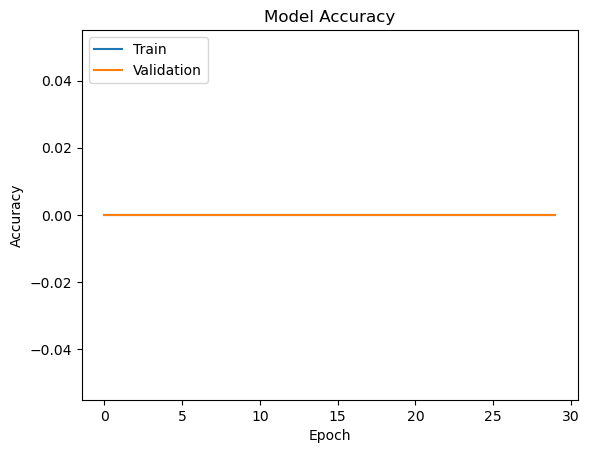

In [45]:
plot_model_history(nn_model_2_seq)


**Observations:_______**

Again, with the model evaluation, model accuracy is close to zero on both training, and test data.

***Potentially, something is wrong with the model building***

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [43]:
accuracy = nn_model_2_seq.model().evaluate(np_x_test_normalized, y_test_encoded, verbose=2)

563/563 - 1s - 2ms/step - accuracy: 0.0000e+00 - loss: 2.4899


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [44]:
y_pred=nn_model_2_seq.model().predict(np_x_test_normalized)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

In [46]:
import seaborn as sns

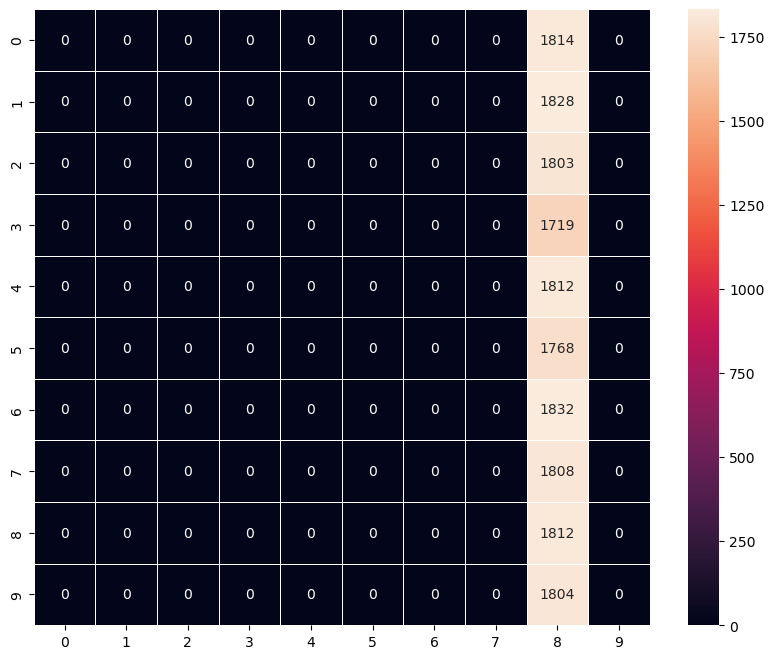

In [47]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Final Observations:**

Either ANN models are not working with this data or there is something wrong in  model building.

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [48]:
svhn_data_cnn = h5py.File(data_file, 'r')

In [49]:
data_keys = list(svhn_data_cnn.keys())
print(data_keys)

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


Check the number of images in the training and the testing dataset.

In [50]:
x_cnn_train = svhn_data_cnn['X_train']
y_cnn_train = svhn_data_cnn['y_train']

In [53]:
print(x_cnn_train.shape)

(42000, 32, 32)


In [51]:
x_cnn_test = svhn_data_cnn['X_test']
y_cnn_test = svhn_data_cnn['y_test']

In [54]:
print(x_cnn_test.shape)

(18000, 32, 32)


**Observation:**


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [55]:
print("Shape of the first image in the training dataset")
x_cnn_train[0].shape

Shape of the first image in the training dataset


(32, 32)

In [56]:
print("Image data of the first image in the traiing dataset")
x_cnn_train[0]

Image data of the first image in the traiing dataset


array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

## Convert the H5 dataset to np array

In [58]:
# Let's first bring the data to np arrays
np_x_cnn_train = np.zeros(x_cnn_train.shape, dtype=np.float32)
np_x_cnn_test = np.zeros(x_cnn_test.shape, dtype=np.float32)

Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [60]:
x_cnn_train = np_x_cnn_train.reshape((np_x_cnn_train.shape[0], 32, 32, 1))
print(x_cnn_test.shape)

(42000, 32, 32, 1)


In [61]:
x_cnn_test = np_x_cnn_test.reshape((np_x_cnn_test.shape[0], 32, 32, 1))
print(x_cnn_test.shape)

(18000, 32, 32, 1)


Normalize inputs from 0-255 to 0-1

In [62]:
x_cnn_train_normalized = x_cnn_train.astype('float32')/255.0
x_cnn_test_normalized = x_cnn_test.astype('float32')/255.0

Print New shape of Training and Test

In [63]:
print(x_cnn_train_normalized.shape)

(42000, 32, 32, 1)


In [64]:
print(x_cnn_test_normalized.shape)

(18000, 32, 32, 1)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [66]:
# Creating one-hot encoded representation of target labels

# We can do this by using this utility function - https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
y_cnn_train_encoded = tf.keras.utils.to_categorical(y_cnn_train)
y_cnn_test_encoded = tf.keras.utils.to_categorical(y_cnn_test)

In [67]:
print(y_cnn_train_encoded.shape)
print(y_cnn_test_encoded.shape)

(42000, 10)
(18000, 10)


**Observation:**


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [68]:
tf.keras.backend.clear_session()

In [69]:
np.random.seed(20)
import random
random.seed(20)
tf.random.set_seed(20)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [73]:
class TfKeraModel_CNN_1(TfKeraModel):
    @staticmethod
    def cnn_model_1():
        model = tf.keras.models.Sequential()
        model.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 1)))
        model.add(tf.keras.layers.LeakyReLU(0.1))
        model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = "same"))
        model.add(tf.keras.layers.LeakyReLU(0.1))
        model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(32))
        model.add(tf.keras.layers.LeakyReLU(0.1))
        model.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax))
        return TfKeraModel_CNN_1(model)
    
    def __init__(self, seq_model:tf.keras.models.Sequential):
        super().__init__(seq_model)
        self.__model__ = seq_model        

    def compile(self):
        print('Compiling model')
        self.__model__.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics = [tf.keras.metrics.Accuracy],
                    loss = tf.keras.losses.CategoricalCrossentropy)
        print("Model Compiled")

In [74]:
cnn_model_1_seq = TfKeraModel_CNN_1.cnn_model_1()

In [75]:
cnn_model_1_seq.compile()

Compiling model
Model Compiled


In [76]:
cnn_model_1_seq.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       262,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267,306 (1.02 MB)

 Trainable params: 267,306 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [79]:
model_history = cnn_model_1_seq.model().fit(x=x_cnn_train_normalized,
                            y=y_cnn_train_encoded,
                            validation_split=0.2,
                            batch_size=32,
                            verbose=1,
                            epochs=20)

cnn_model_1_seq.set_model_history(model_history)

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.0000e+00 - loss: 2.3030 - val_accuracy: 0.0000e+00 - val_loss: 2.3028
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.0000e+00 - loss: 2.3029 - val_accuracy: 0.0000e+00 - val_loss: 2.3028
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.0000e+00 - loss: 2.3029 - val_accuracy: 0.0000e+00 - val_loss: 2.3027
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.0000e+00 - loss: 2.3029 - val_accuracy: 0.0000e+00 - val_loss: 2.3028
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.0000e+00 - loss: 2.3029 - val_accuracy: 0.0000e+00 - val_loss: 2.3030
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.0000e+00 - loss: 2.3030 - val_accuracy: 0.0000e+00 - val_loss: 2.3063
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.0000e+00 - loss: 2.3028 - val_accuracy: 0.0000e+00 - val_loss: 2.3028
Epoch 8/20
1050/1050

### **Plot the Training and Validation Accuracies and Write your observations.**

In [80]:
show_model_history(cnn_model_1_seq)

20
accuracy:0.0 loss:2.3031468391418457 val_accuracy:0.0 val_loss:2.3028159141540527 
accuracy:0.0 loss:2.30295467376709 val_accuracy:0.0 val_loss:2.3027637004852295 
accuracy:0.0 loss:2.3029496669769287 val_accuracy:0.0 val_loss:2.302741765975952 
accuracy:0.0 loss:2.303187370300293 val_accuracy:0.0 val_loss:2.3027777671813965 
accuracy:0.0 loss:2.302929639816284 val_accuracy:0.0 val_loss:2.3029816150665283 
accuracy:0.0 loss:2.3031222820281982 val_accuracy:0.0 val_loss:2.306264877319336 
accuracy:0.0 loss:2.302933692932129 val_accuracy:0.0 val_loss:2.3028433322906494 
accuracy:0.0 loss:2.303046941757202 val_accuracy:0.0 val_loss:2.3027801513671875 
accuracy:0.0 loss:2.3030638694763184 val_accuracy:0.0 val_loss:2.302854537963867 
accuracy:0.0 loss:2.303016424179077 val_accuracy:0.0 val_loss:2.30275821685791 
accuracy:0.0 loss:2.303081750869751 val_accuracy:0.0 val_loss:2.3029274940490723 
accuracy:0.0 loss:2.302997350692749 val_accuracy:0.0 val_loss:2.3027777671813965 
accuracy:0.0 lo

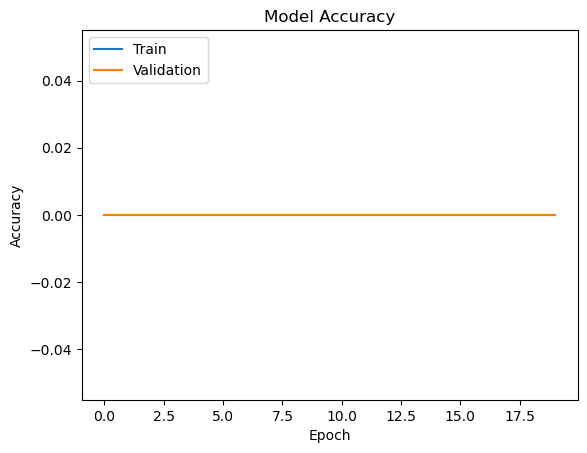

In [81]:
plot_model_history(cnn_model_1_seq)

**Observations:**

Model is still showing accuracy as zero - certainly something is incorrect in data prep.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [82]:
tf.keras.backend.clear_session()

In [83]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [92]:
class TfKeraModel_CNN_2(TfKeraModel):
    @staticmethod
    def cnn_model_2():
        model = tf.keras.models.Sequential()
        # first convolutional layer
        model.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 1)))
        model.add(tf.keras.layers.LeakyReLU(0.1))
        # second convolutional layer
        model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = "same"))
        model.add(tf.keras.layers.LeakyReLU(0.1))
        model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
        model.add(tf.keras.layers.BatchNormalization())
        # third convolutional layer
        model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = "same"))
        model.add(tf.keras.layers.LeakyReLU(0.1))
        # fourth convolutional layer
        model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = "same"))
        model.add(tf.keras.layers.LeakyReLU(0.1))
        model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(32))
        model.add(tf.keras.layers.LeakyReLU(0.1))
        model.add(tf.keras.layers.Dropout(0.5))
        model.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax))
        return TfKeraModel_CNN_2(model)
    
    def __init__(self, seq_model:tf.keras.models.Sequential):
        super().__init__(seq_model)
        self.__model__ = seq_model        

    def compile(self):
        print('Compiling model')
        self.__model__.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics = [tf.keras.metrics.Accuracy],
                    loss = tf.keras.losses.CategoricalCrossentropy)
        print("Model Compiled")

In [93]:
cnn_model_2_seq = TfKeraModel_CNN_2.cnn_model_2()

c:\Users\amit_\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [94]:
cnn_model_2_seq.compile()

Compiling model
Model Compiled


In [95]:
cnn_model_2_seq.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │        65,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_15 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,450 (349.41 KB)

 Trainable params: 89,322 (348.91 KB)

 Non-trainable params: 128 (512.00 B)

In [96]:
cnn_model_history = cnn_model_2_seq.model().fit(x=x_cnn_train_normalized,
                            y=y_cnn_train_encoded,
                            validation_split=0.2,
                            batch_size=128,
                            verbose=1,
                            epochs=30)

cnn_model_2_seq.set_model_history(cnn_model_history)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 25s 78ms/step - accuracy: 0.0000e+00 - loss: 2.3036 - val_accuracy: 0.0000e+00 - val_loss: 2.3028
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.0000e+00 - loss: 2.3030 - val_accuracy: 0.0000e+00 - val_loss: 2.3034
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - accuracy: 0.0000e+00 - loss: 2.3029 - val_accuracy: 0.0000e+00 - val_loss: 2.3033
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.0000e+00 - loss: 2.3028 - val_accuracy: 0.0000e+00 - val_loss: 2.3030
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.0000e+00 - loss: 2.3029 - val_accuracy: 0.0000e+00 - val_loss: 2.3244
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 19s 73ms/step - accuracy: 0.0000e+00 - loss: 2.3034 - val_accuracy: 0.0000e+00 - val_loss: 2.3362
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - accuracy: 0.0000e+00 - loss: 2.3028 - val_accuracy: 0.0000e+00 - val_loss: 2.3063
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━

### **Plot the Training and Validation accuracies and write your observations.**

In [97]:

show_model_history(cnn_model_2_seq)

30
accuracy:0.0 loss:2.30318546295166 val_accuracy:0.0 val_loss:2.302826404571533 
accuracy:0.0 loss:2.3028550148010254 val_accuracy:0.0 val_loss:2.303368091583252 
accuracy:0.0 loss:2.3027870655059814 val_accuracy:0.0 val_loss:2.3033461570739746 
accuracy:0.0 loss:2.3028275966644287 val_accuracy:0.0 val_loss:2.3029966354370117 
accuracy:0.0 loss:2.3027749061584473 val_accuracy:0.0 val_loss:2.3244030475616455 
accuracy:0.0 loss:2.3031389713287354 val_accuracy:0.0 val_loss:2.3362157344818115 
accuracy:0.0 loss:2.3027703762054443 val_accuracy:0.0 val_loss:2.306252956390381 
accuracy:0.0 loss:2.3028006553649902 val_accuracy:0.0 val_loss:2.363354206085205 
accuracy:0.0 loss:2.3037073612213135 val_accuracy:0.0 val_loss:2.403069019317627 
accuracy:0.0 loss:2.302884817123413 val_accuracy:0.0 val_loss:2.3237009048461914 
accuracy:0.0 loss:2.302780866622925 val_accuracy:0.0 val_loss:2.302913188934326 
accuracy:0.0 loss:2.3028223514556885 val_accuracy:0.0 val_loss:2.521972417831421 
accuracy:0.0

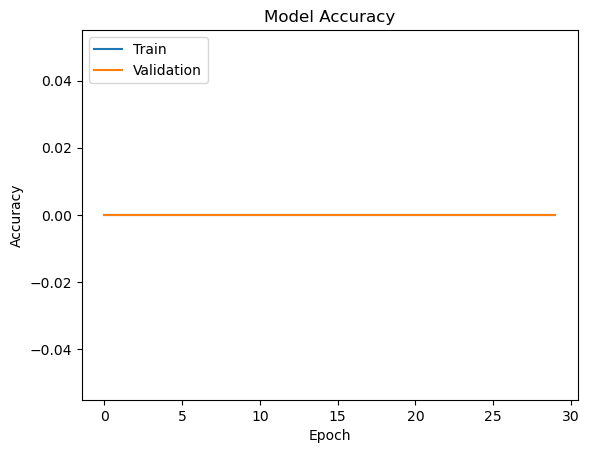

In [98]:
plot_model_history(cnn_model_2_seq)

**Observations:________**

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [99]:
accuracy = cnn_model_2_seq.model().evaluate(x_cnn_test_normalized, y_cnn_test_encoded, verbose=2)

563/563 - 4s - 6ms/step - accuracy: 0.0000e+00 - loss: 2.3591


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [100]:
y_cnn_pred=cnn_model_2_seq.model().predict(x_cnn_test_normalized)

563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


In [101]:
y_cnn_pred

array([[0.08227386, 0.16985482, 0.07514109, ..., 0.09247037, 0.13605784,
        0.09287409],
       [0.08227386, 0.16985482, 0.07514109, ..., 0.09247037, 0.13605784,
        0.09287409],
       [0.08227386, 0.16985482, 0.07514109, ..., 0.09247037, 0.13605784,
        0.09287409],
       ...,
       [0.08227386, 0.16985482, 0.07514109, ..., 0.09247037, 0.13605784,
        0.09287409],
       [0.08227386, 0.16985482, 0.07514109, ..., 0.09247036, 0.13605782,
        0.09287408],
       [0.08227386, 0.16985482, 0.07514109, ..., 0.09247036, 0.13605782,
        0.09287408]], dtype=float32)

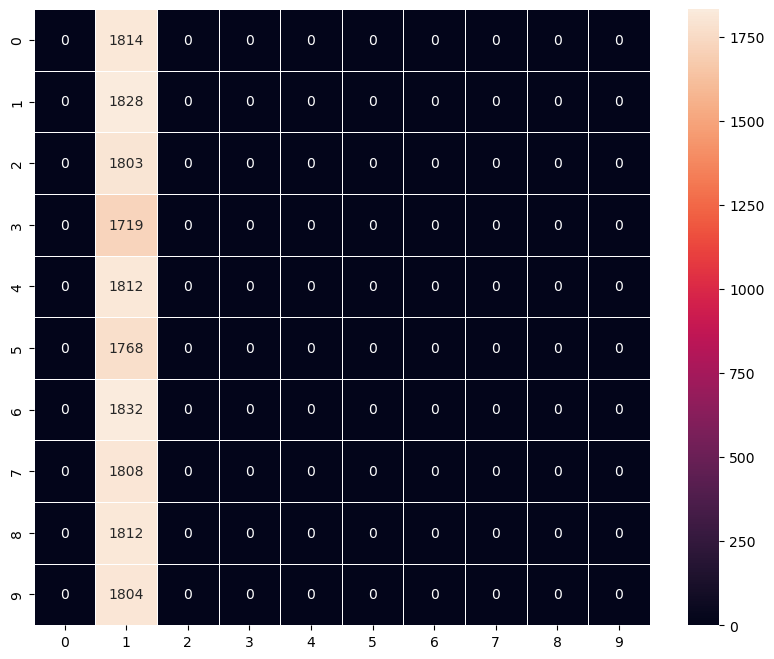

In [102]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_cnn_pred,axis=1)
y_test_arg=np.argmax(y_cnn_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

### **Write your final observations on the performance of the model on the test data.**

**Final Observations:_________**